# Clasificación de Estados de la Republica con LSM

## Acerca del dataset

## Librerias utilizadas

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

## Analisis Exploratorio

### Conjunto de datos en 2D

In [2]:
dataframes = []
dir_path = '../data/2d_DATA/'
for folder in os.listdir(dir_path):
    path = os.path.join(dir_path, folder)
    if os.path.isdir(path):
        for file in os.listdir(path=path):
            if file.endswith('.csv'):
                path_file = os.path.join(path, file)
                df = pd.read_csv(path_file)
                dataframes.append(df)
df_2d = pd.concat(dataframes, ignore_index=True)
df_2d

,class,hand,k0x,k0y,k1x,k1y,k2x,k2y,k3x,k3y,...,k16x,k16y,k17x,k17y,k18x,k18y,k19x,k19y,k20x,k20y
0,0,Right,0.0,0.0,-0.349112,-0.106509,-0.544379,-0.319527,-0.692308,-0.485207,...,-0.550296,-0.390533,-0.082840,-0.514793,-0.420118,-0.562130,-0.544379,-0.426036,-0.508876,-0.331361
1,0,Right,0.0,0.0,-0.361257,-0.146597,-0.549738,-0.350785,-0.696335,-0.486911,...,-0.549738,-0.471204,-0.130890,-0.544503,-0.450262,-0.591623,-0.549738,-0.481675,-0.523560,-0.403141
2,0,Right,0.0,0.0,-0.314554,-0.126761,-0.469484,-0.319249,-0.600939,-0.455399,...,-0.507042,-0.403756,-0.117371,-0.511737,-0.417840,-0.558685,-0.511737,-0.450704,-0.507042,-0.361502
3,0,Right,0.0,0.0,-0.255906,-0.102362,-0.389764,-0.255906,-0.503937,-0.362205,...,-0.413386,-0.350394,-0.106299,-0.421260,-0.354331,-0.464567,-0.421260,-0.370079,-0.393701,-0.299213
4,0,Right,0.0,0.0,-0.238971,-0.095588,-0.356618,-0.238971,-0.452206,-0.345588,...,-0.389706,-0.319853,-0.106618,-0.382353,-0.349265,-0.430147,-0.408088,-0.334559,-0.378676,-0.261029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5737,31,Right,0.0,0.0,0.020325,-0.154472,0.109756,-0.296748,0.300813,-0.325203,...,0.357724,-0.191057,0.471545,-0.211382,0.593496,-0.231707,0.512195,-0.162602,0.422764,-0.134146
5738,31,Right,0.0,0.0,0.004739,-0.165877,0.118483,-0.341232,0.331754,-0.360190,...,0.421801,-0.180095,0.563981,-0.227488,0.696682,-0.218009,0.582938,-0.146919,0.488152,-0.123223
5739,31,Right,0.0,0.0,0.018072,-0.198795,0.156627,-0.379518,0.421687,-0.379518,...,0.680723,-0.138554,0.740964,-0.234940,0.927711,-0.265060,0.861446,-0.174699,0.740964,-0.108434
5740,31,Right,0.0,0.0,-0.006289,-0.125786,0.100629,-0.264151,0.345912,-0.283019,...,0.748428,-0.050314,0.761006,-0.163522,0.981132,-0.157233,0.911950,-0.056604,0.786164,-0.006289


### Conjunto de datos en 3D

In [3]:
dataframes = []
dir_path = '../data/3d_DATA/'
for folder in os.listdir(dir_path):
    path = os.path.join(dir_path, folder)
    if os.path.isdir(path):
        for file in os.listdir(path=path):
            if file.endswith('.csv'):
                path_file = os.path.join(path, file)
                df = pd.read_csv(path_file)
                dataframes.append(df)
df_3d = pd.concat(dataframes, ignore_index=True)
df_3d

,class,hand,k0x,k0y,k0z,k1x,k1y,k1z,k2x,k2y,...,k17z,k18x,k18y,k18z,k19x,k19y,k19z,k20x,k20y,k20z
0,0,Right,0.0,0.0,0.0,-0.360656,-0.114754,0.000014,-0.568306,-0.322404,...,-0.000140,-0.453552,-0.546448,-0.000168,-0.557377,-0.420765,-0.000148,-0.519126,-0.349727,-0.000127
1,0,Right,0.0,0.0,0.0,-0.348259,-0.154229,0.000017,-0.532338,-0.348259,...,-0.000105,-0.442786,-0.582090,-0.000130,-0.532338,-0.467662,-0.000110,-0.517413,-0.388060,-0.000090
2,0,Right,0.0,0.0,0.0,-0.310502,-0.136986,0.000033,-0.461187,-0.328767,...,-0.000118,-0.415525,-0.566210,-0.000144,-0.502283,-0.452055,-0.000127,-0.488584,-0.356164,-0.000109
3,0,Right,0.0,0.0,0.0,-0.250980,-0.105882,0.000007,-0.384314,-0.262745,...,-0.000092,-0.352941,-0.470588,-0.000121,-0.419608,-0.372549,-0.000110,-0.403922,-0.298039,-0.000094
4,0,Right,0.0,0.0,0.0,-0.238095,-0.098901,0.000007,-0.355311,-0.241758,...,-0.000092,-0.347985,-0.432234,-0.000119,-0.406593,-0.336996,-0.000104,-0.377289,-0.267399,-0.000087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5737,31,Right,0.0,0.0,0.0,0.020325,-0.154472,-0.000088,0.109756,-0.296748,...,-0.000040,0.593496,-0.231707,-0.000088,0.512195,-0.162602,-0.000081,0.422764,-0.134146,-0.000062
5738,31,Right,0.0,0.0,0.0,0.004739,-0.165877,-0.000084,0.118483,-0.341232,...,-0.000061,0.696682,-0.218009,-0.000116,0.582938,-0.146919,-0.000106,0.488152,-0.123223,-0.000084
5739,31,Right,0.0,0.0,0.0,0.018072,-0.198795,-0.000101,0.156627,-0.379518,...,-0.000077,0.927711,-0.265060,-0.000145,0.861446,-0.174699,-0.000147,0.740964,-0.108434,-0.000131
5740,31,Right,0.0,0.0,0.0,-0.006289,-0.125786,-0.000138,0.100629,-0.264151,...,-0.000115,0.981132,-0.157233,-0.000189,0.911950,-0.056604,-0.000194,0.786164,-0.006289,-0.000181


### Visualizacion

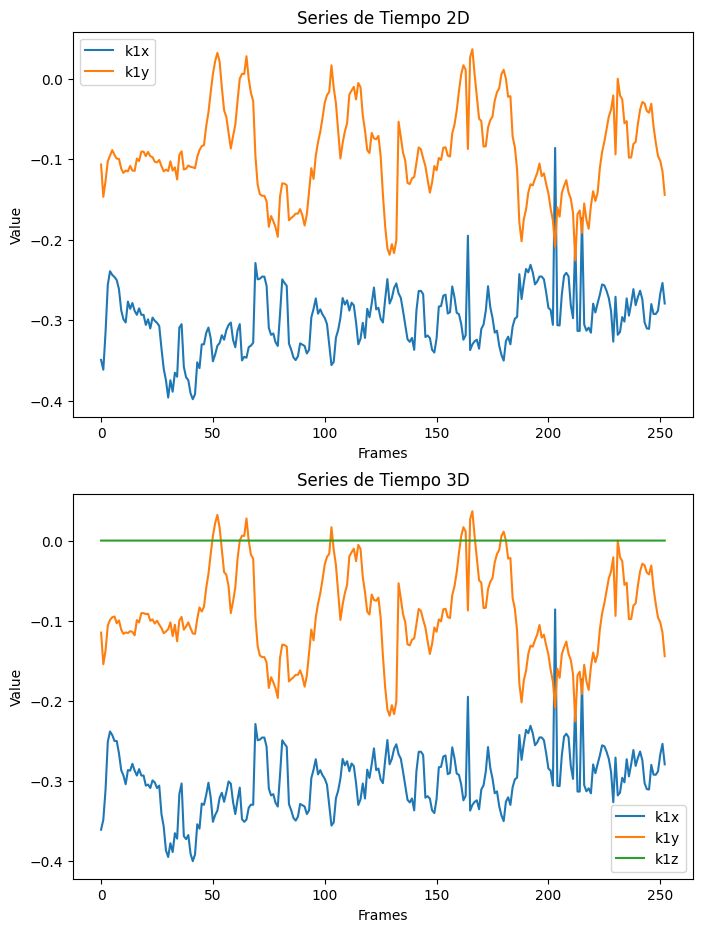

In [94]:
hand2d = df_2d.loc[df_2d['class'] == 0, ['k1x', 'k1y']]
hand3d = df_3d.loc[df_3d['class'] == 0, ['k1x', 'k1y', 'k1z']]
fig, ax = plt.subplots(2,1, figsize=(8,11))
sns.lineplot(data=hand2d, dashes=False, ax=ax[0])
ax[0].set_xlabel('Frames')
ax[0].set_ylabel('Value')
ax[0].set_title('Series de Tiempo 2D')
sns.lineplot(data=hand3d, dashes=False, ax=ax[1])
ax[1].set_xlabel('Frames')
ax[1].set_ylabel('Value')
ax[1].set_title('Series de Tiempo 3D')
plt.show()

<Axes: xlabel='k1x', ylabel='k1y'>

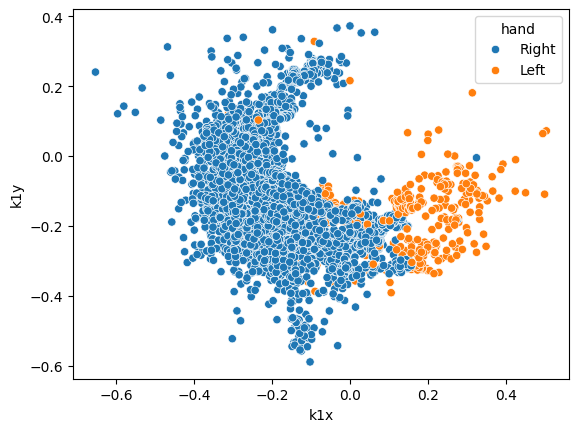

In [7]:
sns.scatterplot(df_2d, x='k1x', y='k1y', hue='hand')

<Axes: xlabel='k1x', ylabel='k1y'>

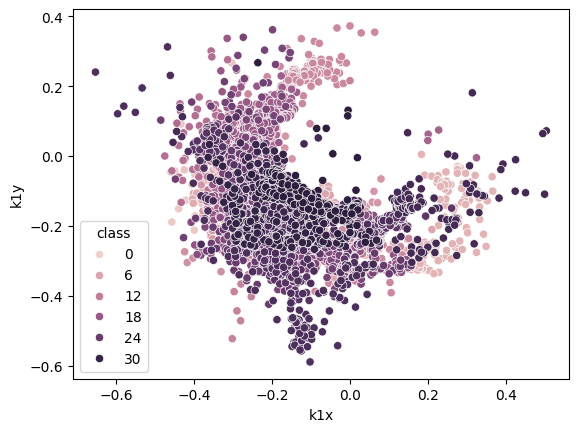

In [23]:
sns.scatterplot(df_2d, x='k1x', y='k1y', hue='class')